<a href="https://colab.research.google.com/github/RM-RAMASAMY/CMPE-255/blob/main/Assignment_3_Pycaret/Multiclass_Classification_With_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets &>/dev/null
!pip install pycaret[full] &>/dev/null

In [2]:
import opendatasets as od
import pandas

In [3]:
od.download("https://www.kaggle.com/datasets/olcaybolat1/dermatology-dataset-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rmramasamy
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/olcaybolat1/dermatology-dataset-classification


100%|██████████| 5.13k/5.13k [00:00<00:00, 10.4MB/s]

In [4]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

In [16]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = pandas.read_csv('/content/dermatology-dataset-classification/dermatology_database_1.csv')


In [17]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [19]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'class', session_id = 123)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5"
4,Original data shape,"(366, 35)"
5,Transformed data shape,"(366, 35)"
6,Transformed train set shape,"(256, 35)"
7,Transformed test set shape,"(110, 35)"
8,Numeric features,33
9,Categorical features,1


In [20]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [21]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [22]:
# init setup on exp
exp.setup(data, target = 'class', session_id = 123)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5"
4,Original data shape,"(366, 35)"
5,Transformed data shape,"(366, 35)"
6,Transformed train set shape,"(256, 35)"
7,Transformed test set shape,"(110, 35)"
8,Numeric features,33
9,Categorical features,1


In [23]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9806,0.9993,0.9806,0.9830,0.9804,0.9757,0.9762,0.3060
lr,Logistic Regression,0.9768,0.0000,0.9768,0.9809,0.9763,0.9709,0.9719,0.5540
gbc,Gradient Boosting Classifier,0.9726,0.0000,0.9726,0.9764,0.9720,0.9655,0.9664,0.6440
lda,Linear Discriminant Analysis,0.9691,0.0000,0.9691,0.9744,0.9691,0.9613,0.9623,0.0550
ridge,Ridge Classifier,0.9689,0.0000,0.9689,0.9719,0.9690,0.9611,0.9617,0.0910
catboost,CatBoost Classifier,0.9688,0.9977,0.9688,0.9716,0.9684,0.9608,0.9615,1.9880
svm,SVM - Linear Kernel,0.9651,0.0000,0.9651,0.9721,0.9649,0.9563,0.9579,0.0640
xgboost,Extreme Gradient Boosting,0.9649,0.9967,0.9649,0.9691,0.9646,0.9560,0.9570,0.2030
rf,Random Forest Classifier,0.9612,0.9978,0.9612,0.9697,0.9602,0.9514,0.9535,0.3840
lightgbm,Light Gradient Boosting Machine,0.9611,0.9973,0.9611,0.9660,0.9606,0.9512,0.9524,0.4030


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [24]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9806,0.9993,0.9806,0.9830,0.9804,0.9757,0.9762,0.2050
lr,Logistic Regression,0.9768,0.0000,0.9768,0.9809,0.9763,0.9709,0.9719,0.1150
gbc,Gradient Boosting Classifier,0.9726,0.0000,0.9726,0.9764,0.9720,0.9655,0.9664,0.8960
lda,Linear Discriminant Analysis,0.9691,0.0000,0.9691,0.9744,0.9691,0.9613,0.9623,0.0570
ridge,Ridge Classifier,0.9689,0.0000,0.9689,0.9719,0.9690,0.9611,0.9617,0.0600
catboost,CatBoost Classifier,0.9688,0.9977,0.9688,0.9716,0.9684,0.9608,0.9615,2.1150
svm,SVM - Linear Kernel,0.9651,0.0000,0.9651,0.9721,0.9649,0.9563,0.9579,0.0630
xgboost,Extreme Gradient Boosting,0.9649,0.9967,0.9649,0.9691,0.9646,0.9560,0.9570,0.1290
rf,Random Forest Classifier,0.9612,0.9978,0.9612,0.9697,0.9602,0.9514,0.9535,0.2160
lightgbm,Light Gradient Boosting Machine,0.9611,0.9973,0.9611,0.9660,0.9606,0.9512,0.9524,0.2620


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

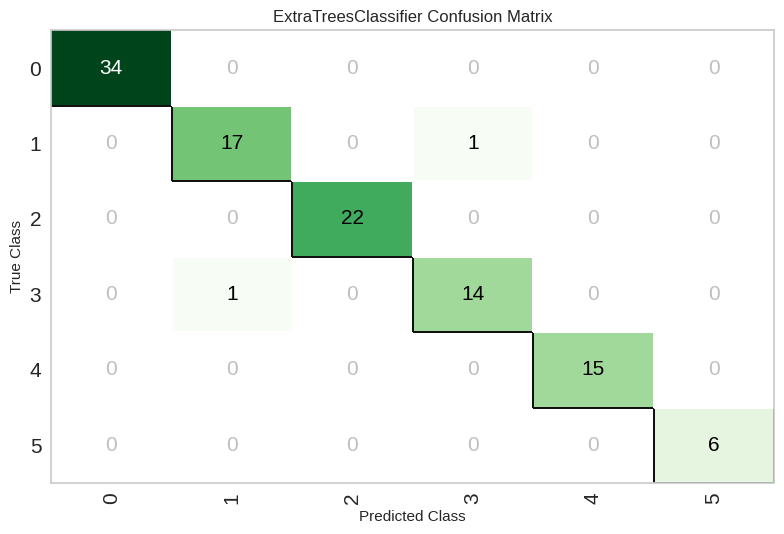

In [25]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

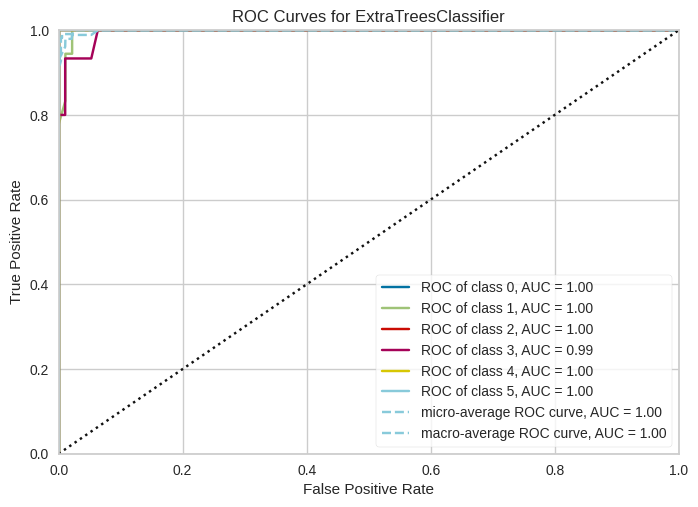

In [26]:
# plot AUC
plot_model(best, plot = 'auc')

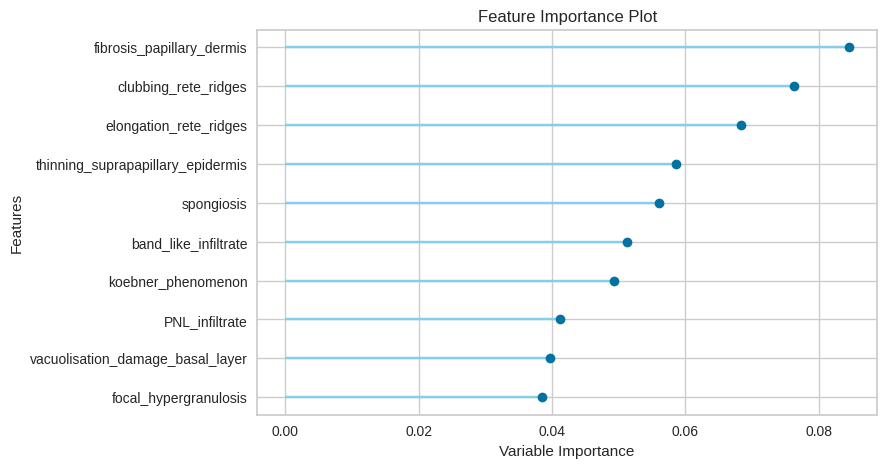

In [27]:
# plot feature importance
plot_model(best, plot = 'feature')

In [28]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

In [29]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [30]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9818,0.9988,0.9818,0.9818,0.9818,0.9772,0.9772


In [31]:
# show predictions df
holdout_pred.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class,prediction_label,prediction_score
120,3,3,2,2,0,0,0,0,0,0,...,3,0,0,0,2,0,33,2,2,0.62
353,1,1,1,2,0,0,0,0,0,0,...,1,0,0,0,2,0,45,5,5,0.94
325,3,1,1,0,1,0,0,0,0,0,...,2,0,0,0,2,0,46,4,4,0.97
347,2,2,0,1,0,0,2,0,2,0,...,1,0,2,2,2,0,22,6,6,0.83
20,2,1,1,2,0,0,3,0,1,2,...,0,0,1,2,1,0,8,6,6,0.53


In [32]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('class', axis=1, inplace=True)
new_data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,3,0,0,0,1,0,55
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,8
2,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,3,26
3,2,2,2,0,0,0,0,0,3,2,...,0,3,0,0,0,0,0,3,0,40
4,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,3,45


In [33]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,prediction_label,prediction_score
0,2,2,0,3,0,0,0,0,1,0,...,0,3,0,0,0,1,0,55,2,1.0
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,1,0,8,1,1.0
2,2,1,2,3,1,3,0,3,0,0,...,2,3,2,0,0,2,3,26,3,1.0
3,2,2,2,0,0,0,0,0,3,2,...,0,0,0,0,0,3,0,40,1,1.0
4,2,3,2,2,2,2,0,2,0,0,...,3,2,3,0,0,2,3,45,3,1.0


In [34]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['erythema', 'scaling',
                                              'definite_borders', 'itching',
                                              'koebner_phenomenon',
                                              'polygonal_papules',
                                              'follicular_papules',
                                              'oral_mucosal_involvement',
                                              '...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_

In [35]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['erythema', 'scaling',
                                             'definite_borders', 'itching',
                                             'koebner_phenomenon',
                                             'polygonal_papules',
                                             'follicular_papules',
                                             'oral_mucosal_inv...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=100,
                                      n_jobs=-1, oob_score=False,
                                      random_state=123, verbose=0,
                                      warm_start=False))],
         verbose=False)

In [36]:
s = setup(data, target = 'class', session_id = 123)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5"
4,Original data shape,"(366, 35)"
5,Transformed data shape,"(366, 35)"
6,Transformed train set shape,"(256, 35)"
7,Transformed test set shape,"(110, 35)"
8,Numeric features,33
9,Categorical features,1


In [37]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [38]:
# lets access X_train_transformed
get_config('X_train_transformed')

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age
100,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.734056
292,2.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,3.0,2.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.879426
83,3.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.143181
58,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.758811
340,2.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.505687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1.747549
154,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.843511
146,3.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,1.880181
165,3.0,2.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.522074


In [39]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [40]:
# help(setup)

In [41]:
# init setup with normalize = True

s = setup(data, target = 'class', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5"
4,Original data shape,"(366, 35)"
5,Transformed data shape,"(366, 35)"
6,Transformed train set shape,"(256, 35)"
7,Transformed test set shape,"(110, 35)"
8,Numeric features,33
9,Categorical features,1


<Axes: >

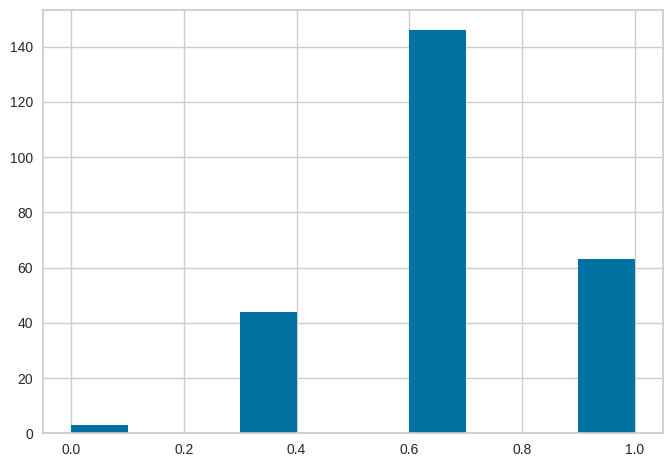

In [42]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['erythema'].hist()

<Axes: >

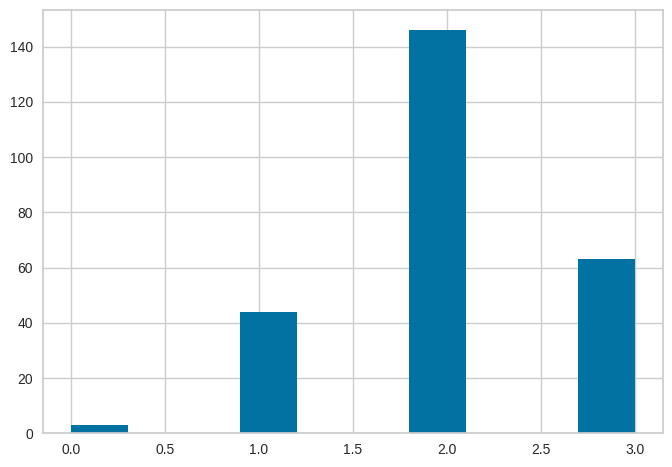

In [43]:
get_config('X_train')['erythema'].hist()

In [44]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9806,0.9993,0.9806,0.9830,0.9804,0.9757,0.9762,0.2530
lr,Logistic Regression,0.9768,0.0000,0.9768,0.9799,0.9764,0.9709,0.9716,0.0750
gbc,Gradient Boosting Classifier,0.9726,0.0000,0.9726,0.9764,0.9720,0.9655,0.9664,0.7130
lda,Linear Discriminant Analysis,0.9691,0.0000,0.9691,0.9744,0.9691,0.9613,0.9623,0.1140
svm,SVM - Linear Kernel,0.9689,0.0000,0.9689,0.9754,0.9686,0.9611,0.9625,0.1150
ridge,Ridge Classifier,0.9689,0.0000,0.9689,0.9719,0.9690,0.9611,0.9617,0.1120
knn,K Neighbors Classifier,0.9688,0.9954,0.9688,0.9755,0.9684,0.9608,0.9623,0.0670
catboost,CatBoost Classifier,0.9688,0.9977,0.9688,0.9716,0.9684,0.9608,0.9615,2.0780
xgboost,Extreme Gradient Boosting,0.9649,0.9967,0.9649,0.9691,0.9646,0.9560,0.9570,0.1320
rf,Random Forest Classifier,0.9612,0.9978,0.9612,0.9697,0.9602,0.9514,0.9535,0.2450


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [45]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [46]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbc', 'xgboost', 'lightgbm', 'catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9806,0.9993,0.9806,0.9830,0.9804,0.9757,0.9762,0.1890
gbc,Gradient Boosting Classifier,0.9726,0.0000,0.9726,0.9764,0.9720,0.9655,0.9664,0.7980
catboost,CatBoost Classifier,0.9688,0.9977,0.9688,0.9716,0.9684,0.9608,0.9615,1.8690
xgboost,Extreme Gradient Boosting,0.9649,0.9967,0.9649,0.9691,0.9646,0.9560,0.9570,0.1980
rf,Random Forest Classifier,0.9612,0.9978,0.9612,0.9697,0.9602,0.9514,0.9535,0.2320
lightgbm,Light Gradient Boosting Machine,0.9611,0.9973,0.9611,0.9660,0.9606,0.9512,0.9524,0.3840
dt,Decision Tree Classifier,0.9458,0.9656,0.9458,0.9521,0.9446,0.9318,0.9338,0.0650


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [47]:
compare_tree_models

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [48]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9806,0.9993,0.9806,0.9830,0.9804,0.9757,0.9762,0.189
gbc,Gradient Boosting Classifier,0.9726,0.0000,0.9726,0.9764,0.9720,0.9655,0.9664,0.798
catboost,CatBoost Classifier,0.9688,0.9977,0.9688,0.9716,0.9684,0.9608,0.9615,1.869
xgboost,Extreme Gradient Boosting,0.9649,0.9967,0.9649,0.9691,0.9646,0.9560,0.9570,0.198
rf,Random Forest Classifier,0.9612,0.9978,0.9612,0.9697,0.9602,0.9514,0.9535,0.232
lightgbm,Light Gradient Boosting Machine,0.9611,0.9973,0.9611,0.9660,0.9606,0.9512,0.9524,0.384
dt,Decision Tree Classifier,0.9458,0.9656,0.9458,0.9521,0.9446,0.9318,0.9338,0.065


In [49]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9806,0.9993,0.9806,0.9830,0.9804,0.9757,0.9762,0.2020
lr,Logistic Regression,0.9768,0.0000,0.9768,0.9799,0.9764,0.9709,0.9716,0.0790
gbc,Gradient Boosting Classifier,0.9726,0.0000,0.9726,0.9764,0.9720,0.9655,0.9664,0.8050
lda,Linear Discriminant Analysis,0.9691,0.0000,0.9691,0.9744,0.9691,0.9613,0.9623,0.1120
svm,SVM - Linear Kernel,0.9689,0.0000,0.9689,0.9754,0.9686,0.9611,0.9625,0.1040
ridge,Ridge Classifier,0.9689,0.0000,0.9689,0.9719,0.9690,0.9611,0.9617,0.0630
knn,K Neighbors Classifier,0.9688,0.9954,0.9688,0.9755,0.9684,0.9608,0.9623,0.1100
catboost,CatBoost Classifier,0.9688,0.9977,0.9688,0.9716,0.9684,0.9608,0.9615,2.0250
xgboost,Extreme Gradient Boosting,0.9649,0.9967,0.9649,0.9691,0.9646,0.9560,0.9570,0.1320
rf,Random Forest Classifier,0.9612,0.9978,0.9612,0.9697,0.9602,0.9514,0.9535,0.2190


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [50]:
# list of top 3 models by Recall
best_recall_models_top3

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=123, verbose=0,
                      warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='lo

In [51]:
# help(compare_models)

In [52]:
# from pycaret.classification import *
# s = setup(data, target = 'Class variable', log_experiment='mlflow', experiment_name='iris_experiment')

In [53]:
# compare models
# best = compare_models()

In [54]:
# start mlflow server on localhost:5000
# !mlflow ui

In [55]:
# help(setup)

In [56]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [57]:
# train logistic regression with default fold=10
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.0000,0.9231,0.9231,0.9231,0.9030,0.9030
1,0.9615,0.0000,0.9615,0.9692,0.9615,0.9523,0.9540
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9615,0.0000,0.9615,0.9692,0.9609,0.9520,0.9538
5,0.9615,0.0000,0.9615,0.9692,0.9598,0.9519,0.9537
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [58]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.0,0.9231,0.9231,0.9231,0.9030,0.9030
1,0.9615,0.0,0.9615,0.9692,0.9615,0.9523,0.9540
2,1.0000,0.0,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9615,0.0,0.9615,0.9692,0.9609,0.9520,0.9538
5,0.9615,0.0,0.9615,0.9692,0.9598,0.9519,0.9537
6,1.0000,0.0,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0,1.0000,1.0000,1.0000,1.0000,1.0000


In [59]:
# train logistic regression with fold=3
lr = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9651,0.0000,0.9651,0.9662,0.9653,0.9564,0.9566
1,0.9765,0.0000,0.9765,0.9765,0.9765,0.9705,0.9705
2,0.9882,0.0000,0.9882,0.9890,0.9882,0.9853,0.9854
Mean,0.9766,0.0000,0.9766,0.9772,0.9766,0.9707,0.9708
Std,0.0094,0.0000,0.0094,0.0093,0.0093,0.0118,0.0118


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [60]:
# train logistic regression with specific model parameters
create_model('lr', C = 0.5, l1_ratio = 0.15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.0000,0.9231,0.9231,0.9231,0.9030,0.9030
1,0.9615,0.0000,0.9615,0.9692,0.9615,0.9523,0.9540
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9615,0.0000,0.9615,0.9692,0.9609,0.9520,0.9538
5,0.9615,0.0000,0.9615,0.9692,0.9598,0.9519,0.9537
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.15, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
# help(create_model)

In [63]:
# train a dt model with default params
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8462,0.8949,0.8462,0.8584,0.8388,0.8015,0.8113
1,0.9615,0.9773,0.9615,0.9692,0.9615,0.9523,0.9540
2,0.8077,0.8806,0.8077,0.8205,0.8065,0.7615,0.7629
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9615,0.9773,0.9615,0.9692,0.9609,0.9520,0.9538
5,0.9615,0.9722,0.9615,0.9658,0.9599,0.9517,0.9535
6,0.9600,0.9762,0.9600,0.9680,0.9582,0.9493,0.9512
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [64]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.9468,0.9231,0.9370,0.9221,0.9026,0.9060
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9231,0.9630,0.9231,0.9295,0.9184,0.9046,0.9063
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9231,0.9833,0.9231,0.9487,0.9267,0.9048,0.9098
5,0.9615,0.9722,0.9615,0.9658,0.9599,0.9517,0.9535
6,0.9200,0.9907,0.9200,0.9280,0.9209,0.8996,0.9014
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9600,1.0000,0.9600,0.9700,0.9615,0.9499,0.9518


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [65]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [66]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = F1
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8846,0.9287,0.8846,0.9197,0.8830,0.8545,0.8626
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8077,0.8678,0.8077,0.8761,0.7886,0.7601,0.7793
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9615,0.9773,0.9615,0.9692,0.9609,0.9520,0.9538
5,0.9615,0.9722,0.9615,0.9658,0.9599,0.9517,0.9535
6,0.9600,0.9762,0.9600,0.9680,0.9582,0.9493,0.9512
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [67]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.9468,0.9231,0.9370,0.9221,0.9026,0.9060
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9231,0.9630,0.9231,0.9295,0.9184,0.9046,0.9063
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9231,0.9833,0.9231,0.9487,0.9267,0.9048,0.9098
5,0.9615,0.9722,0.9615,0.9658,0.9599,0.9517,0.9535
6,0.9200,0.9907,0.9200,0.9280,0.9209,0.8996,0.9014
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9600,1.0000,0.9600,0.9700,0.9615,0.9499,0.9518


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [68]:
# model object
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_samples_leaf=4,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [69]:
# tuner object
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('label_encoding',
                                              TransformerWrapperWithInverse(exclude=None,
                                                                            include=None,
                                                                            transformer=LabelEncoder())),
                                             ('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['erythema',
                                                                          'scaling',
                                                                          'definite_...
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False, scoring='accuracy', verbose=1)

In [70]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.9564,0.9231,0.9370,0.9221,0.9026,0.9060
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9231,0.9749,0.9231,0.9295,0.9184,0.9046,0.9063
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9231,0.9944,0.9231,0.9487,0.9267,0.9048,0.9098
5,0.9615,0.9712,0.9615,0.9658,0.9599,0.9517,0.9535
6,0.9200,0.9753,0.9200,0.9280,0.9209,0.8996,0.9014
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9600,1.0000,0.9600,0.9680,0.9582,0.9493,0.9512


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 256 samples...
INFO:optuna_integration.sklearn.sklearn:Finished hyperparameter search!


In [71]:
# help(tune_model)

In [72]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.9738,0.9231,0.9370,0.9221,0.9026,0.9060
1,0.9231,0.9902,0.9231,0.9487,0.9212,0.9048,0.9114
2,0.9231,0.9970,0.9231,0.9295,0.9184,0.9046,0.9063
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9231,0.9983,0.9231,0.9487,0.9216,0.9037,0.9088
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9200,0.9973,0.9200,0.9280,0.9209,0.8996,0.9014
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [73]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.0000,0.9231,0.9370,0.9221,0.9026,0.9060
1,0.9615,0.0000,0.9615,0.9692,0.9615,0.9523,0.9540
2,0.9231,0.0000,0.9231,0.9356,0.9179,0.9044,0.9078
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9231,0.0000,0.9231,0.9308,0.9231,0.9042,0.9059
5,0.9615,0.0000,0.9615,0.9658,0.9599,0.9517,0.9535
6,0.9200,0.0000,0.9200,0.9280,0.9209,0.8996,0.9014
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9600,0.0000,0.9600,0.9700,0.9615,0.9499,0.9518


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    monotonic_cst=None,
                                                    random_state=123,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=123)

In [74]:
# help(ensemble_model)

In [75]:
# top 3 models based on recall
best_recall_models_top3

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=123, verbose=0,
                      warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='lo

In [76]:
# blend top 3 models
blend_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.9965,0.9231,0.9231,0.9231,0.9030,0.9030
1,0.9615,0.9963,0.9615,0.9692,0.9615,0.9523,0.9540
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9615,0.9983,0.9615,0.9692,0.9609,0.9520,0.9538
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9600,1.0000,0.9600,0.9680,0.9582,0.9493,0.9512
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingClassifier(estimators=[('Extra Trees Classifier',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='sqrt',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   n_estimators=100, n_jobs=-1...
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=100,
                                                         n_iter_no_change=None,
                                                         random_state=123,
                                                         subsample=1.0,
                                                         tol=0.0001,
                                                         validation_fraction=0.1,
                                                         verbose=0,
                                                         warm_start=False))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

In [77]:
# help(blend_models)

In [78]:
# stack models
stack_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.0000,0.9231,0.9231,0.9231,0.9030,0.9030
1,0.9615,0.0000,0.9615,0.9692,0.9615,0.9523,0.9540
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9615,0.0000,0.9615,0.9692,0.9609,0.9520,0.9538
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9600,0.0000,0.9600,0.9680,0.9582,0.9493,0.9512
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingClassifier(cv=5,
                   estimators=[('Extra Trees Classifier',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     monotonic_cst=None,
                                                     n_estimators=100,
                                                     n_...
                                                           validation_fraction=0.1,
                                                           verbose=0,
                                                           warm_start=False))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=False, stack_method='auto',
                   verbose=0)

In [79]:
# help(stack_models)

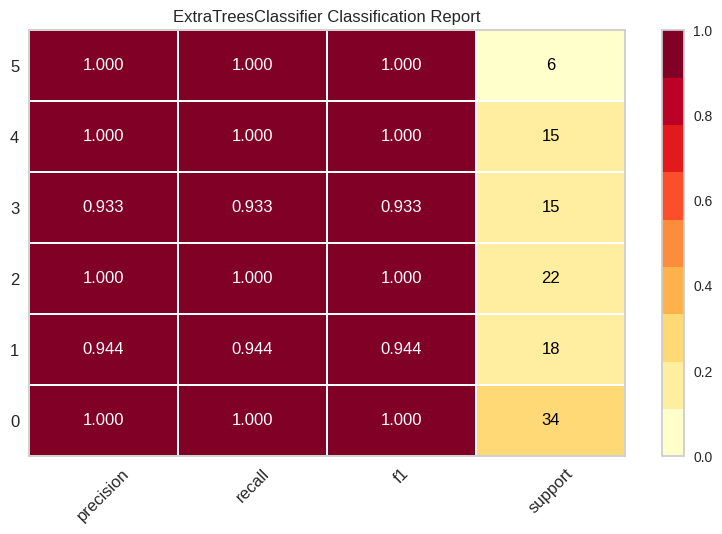

In [80]:
# plot class report
plot_model(best, plot = 'class_report')

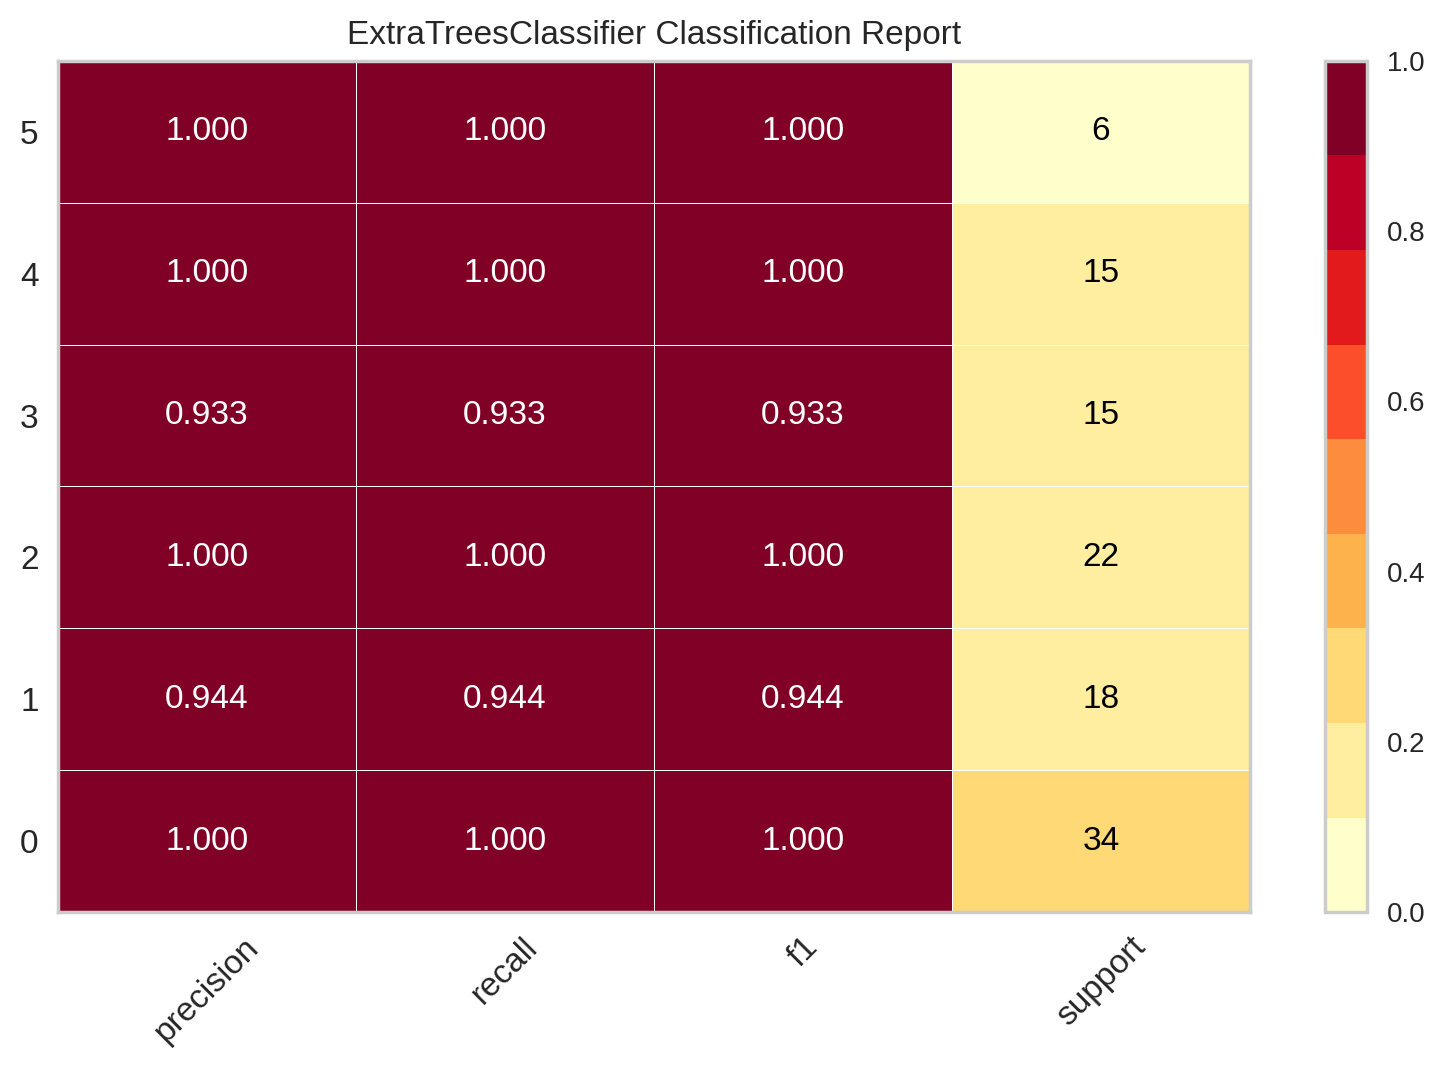

In [81]:
# to control the scale of plot
plot_model(best, plot = 'class_report', scale = 2)

In [82]:
# to save the plot
plot_model(best, plot = 'class_report', save=True)

'Class Report.png'

In [83]:
# help(plot_model)

In [84]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.9912,0.9231,0.9231,0.9231,0.9030,0.9030
1,0.9231,0.9964,0.9231,0.9487,0.9212,0.9048,0.9114
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9231,0.9895,0.9231,0.9308,0.9231,0.9042,0.9059
5,0.9615,1.0000,0.9615,0.9692,0.9609,0.9520,0.9538
6,0.9600,1.0000,0.9600,0.9680,0.9582,0.9493,0.9512
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

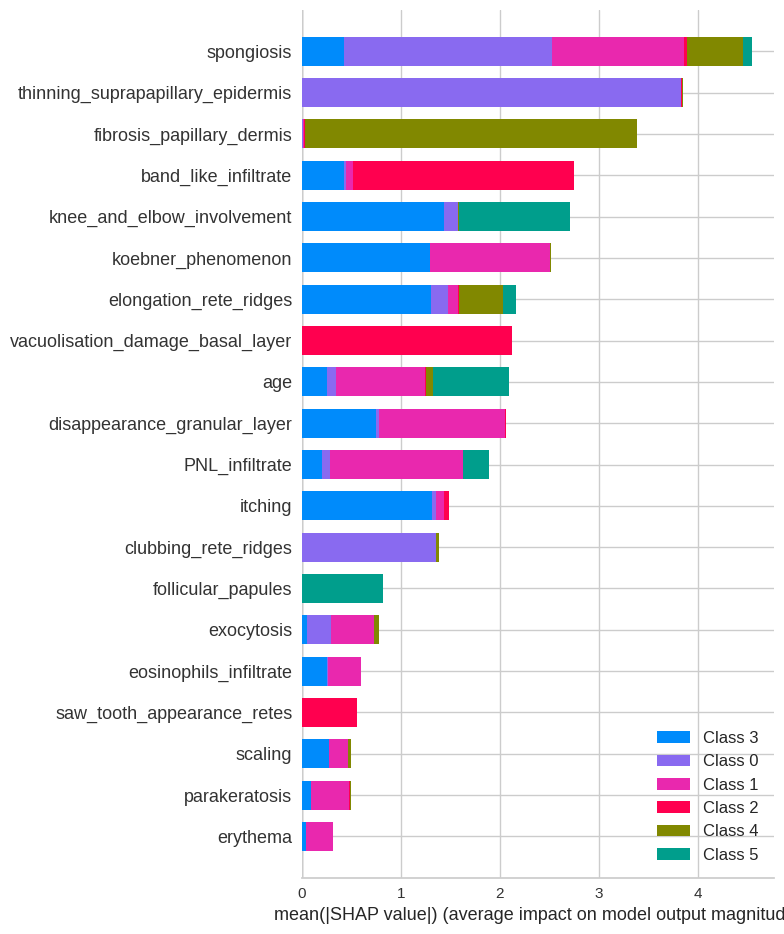

In [85]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [86]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

In [87]:
# help(interpret_model)

In [88]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/58 [00:00<?, ?it/s]

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapperWithInverse(exclude=None, i...",0.9768,0.0000,0.9768,0.9799,0.9764,0.9709,0.9716
1,K Neighbors Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9688,0.9954,0.9688,0.9755,0.9684,0.9608,0.9623
2,Naive Bayes,"(TransformerWrapperWithInverse(exclude=None, i...",0.8825,0.9893,0.8825,0.8855,0.8634,0.8529,0.8668
3,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9458,0.9656,0.9458,0.9521,0.9446,0.9318,0.9338
4,SVM - Linear Kernel,"(TransformerWrapperWithInverse(exclude=None, i...",0.9689,0.0000,0.9689,0.9754,0.9686,0.9611,0.9625
5,Ridge Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9689,0.0000,0.9689,0.9719,0.9690,0.9611,0.9617
6,Random Forest Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9612,0.9978,0.9612,0.9697,0.9602,0.9514,0.9535
7,Quadratic Discriminant Analysis,"(TransformerWrapperWithInverse(exclude=None, i...",0.8949,0.0000,0.8949,0.9404,0.9022,0.8706,0.8765
8,Ada Boost Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.6872,0.0000,0.6872,0.6014,0.6184,0.6053,0.6576


In [89]:
# select the best model based on F1
lb.sort_values(by='F1', ascending=False)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['erythema', 'scaling',
                                             'definite_borders', 'itching',
                                             'koebner_phenomenon',
                                             'polygonal_papules',
                                             'follicular_papules',
                                             'oral_mucosal_involvement',
                                             '...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=100,
                                      n_jobs=-1, oob_score=False,
                                      random_state=123, verbose=0,
                                      warm_start=False)]],
         verbose=False)

In [90]:
# help(get_leaderboard)

In [91]:
automl()

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [93]:
# create gradio app
create_app(best)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://2a1ad986d07747354b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [94]:
# create api
create_api(best, api_name = 'my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


In [95]:
# !python my_first_api.py

In [96]:
# check out the .py file created with this magic command
# %load my_first_api.py

In [97]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [98]:
# check out the DockerFile file created with this magic command
# %load DockerFile

In [99]:
# check out the requirements file created with this magic command
# %load requirements.txt

In [100]:
final_best = finalize_model(best)

In [101]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['erythema', 'scaling',
                                             'definite_borders', 'itching',
                                             'koebner_phenomenon',
                                             'polygonal_papules',
                                             'follicular_papules',
                                             'oral_mucosal_involvement',
                                             '...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=100,
                                      n_jobs=-1, oob_score=False,
                                      random_state=123, verbose=0,
                                      warm_start=False))],
         verbose=False)

In [102]:
# transpiles learned function to java
print(convert_model(dt, language = 'java'))

public class Model {
    public static double[] score(double[] input) {
        double[] var0;
        if (input[19] <= 0.1666666716337204) {
            if (input[32] <= 0.5000000149011612) {
                if (input[14] <= 0.1666666716337204) {
                    if (input[4] <= 0.1666666716337204) {
                        if (input[30] <= 0.1666666716337204) {
                            if (input[25] <= 0.1666666716337204) {
                                if (input[15] <= 0.1666666716337204) {
                                    var0 = new double[] {1.0, 0.0, 0.0, 0.0, 0.0, 0.0};
                                } else {
                                    if (input[3] <= 0.1666666716337204) {
                                        if (input[12] <= 0.25) {
                                            if (input[22] <= 0.3333333432674408) {
                                                if (input[33] <= 0.543823853135109) {
                                                    var0

In [103]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [104]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

In [105]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['erythema', 'scaling',
                                              'definite_borders', 'itching',
                                              'koebner_phenomenon',
                                              'polygonal_papules',
                                              'follicular_papules',
                                              'oral_mucosal_involvement',
                                              '...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_

In [106]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['erythema', 'scaling',
                                             'definite_borders', 'itching',
                                             'koebner_phenomenon',
                                             'polygonal_papules',
                                             'follicular_papules',
                                             'oral_mucosal_inv...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=100,
                                      n_jobs=-1, oob_score=False,
                                      random_state=123, verbose=0,
                                      warm_start=False))],
         verbose=False)

In [107]:
# save experiment
save_experiment('my_experiment')

In [108]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5"
4,Original data shape,"(366, 35)"
5,Transformed data shape,"(366, 35)"
6,Transformed train set shape,"(256, 35)"
7,Transformed test set shape,"(110, 35)"
8,Numeric features,33
9,Categorical features,1
